<a href="https://colab.research.google.com/github/maffant20/Assignment-5/blob/main/CNN_Extended_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

#Load Data
np.random.seed(6) #For reproducibility
(X_train, Y_train),(X_test, Y_test) = cifar10.load_data()

#Dataset characteristics
print('Training Images Size: {}'.format(X_train.shape))
print(X_train[0].shape)

Training Images Size: (50000, 32, 32, 3)
(32, 32, 3)


In [41]:
for i in range(10):
  print('train_label = {}'.format(i))
  idx = (Y_train == i).reshape(X_train.shape[0])
  print('Index Shape: {}'.format(idx.shape))
  filtered_images = X_train[idx]
  print('Filtered Images Shape: {}'.format(filtered_images.shape))

train_label = 0
Index Shape: (50000,)
Filtered Images Shape: (5000, 32, 32, 3)
train_label = 1
Index Shape: (50000,)
Filtered Images Shape: (5000, 32, 32, 3)
train_label = 2
Index Shape: (50000,)
Filtered Images Shape: (5000, 32, 32, 3)
train_label = 3
Index Shape: (50000,)
Filtered Images Shape: (5000, 32, 32, 3)
train_label = 4
Index Shape: (50000,)
Filtered Images Shape: (5000, 32, 32, 3)
train_label = 5
Index Shape: (50000,)
Filtered Images Shape: (5000, 32, 32, 3)
train_label = 6
Index Shape: (50000,)
Filtered Images Shape: (5000, 32, 32, 3)
train_label = 7
Index Shape: (50000,)
Filtered Images Shape: (5000, 32, 32, 3)
train_label = 8
Index Shape: (50000,)
Filtered Images Shape: (5000, 32, 32, 3)
train_label = 9
Index Shape: (50000,)
Filtered Images Shape: (5000, 32, 32, 3)


In [42]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]
print(Y_train.shape)
print(Y_train[0])


(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [43]:
def plot_sam(X,Y,ide):
  
  plt.figure(figsize = (15,2))
  
  plt.imshow(X[ide])
  for i in range(10):
    if Y[ide][i]==1:
      cl = classes[i]
  
  plt.xlabel(cl)
  plt.show()

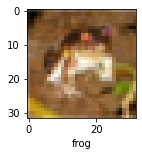

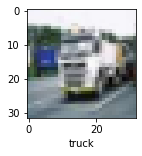

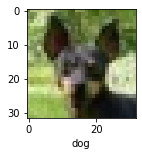

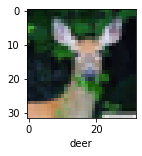

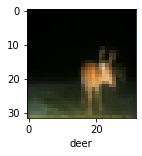

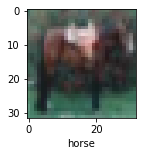

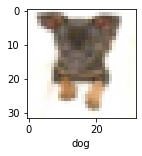

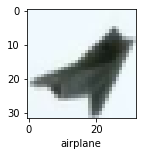

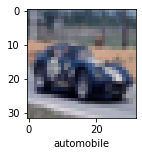

In [44]:
j = [0,1000,2500,3300,4400,5200,6100,7700,8900]

for i in j:
  plot_sam(X_train,Y_train,i) 
  

Training Loss and Accuracy
Epoch 1/10
1250/1250 [==============================] - 198s 157ms/step - loss: 1.6081 - accuracy: 0.4251 - val_loss: 1.3897 - val_accuracy: 0.4936
Epoch 2/10
1250/1250 [==============================] - 174s 139ms/step - loss: 1.2470 - accuracy: 0.5583 - val_loss: 1.1568 - val_accuracy: 0.5864
Epoch 3/10
1250/1250 [==============================] - 168s 134ms/step - loss: 1.0980 - accuracy: 0.6170 - val_loss: 0.9320 - val_accuracy: 0.6712
Epoch 4/10
1250/1250 [==============================] - 167s 134ms/step - loss: 1.0109 - accuracy: 0.6511 - val_loss: 1.0725 - val_accuracy: 0.6267
Epoch 5/10
1250/1250 [==============================] - 168s 134ms/step - loss: 0.9384 - accuracy: 0.6749 - val_loss: 1.0726 - val_accuracy: 0.6223
Epoch 6/10
1250/1250 [==============================] - 168s 135ms/step - loss: 0.8941 - accuracy: 0.6901 - val_loss: 0.7957 - val_accuracy: 0.7207
Epoch 7/10
1250/1250 [==============================] - 168s 135ms/step - loss: 0.840

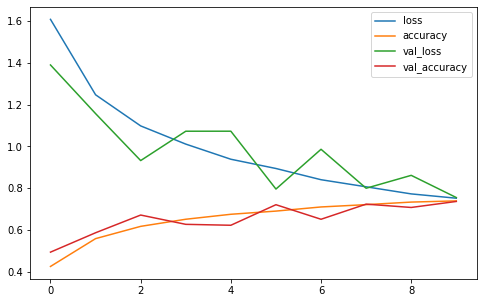

In [45]:

cnn = models.Sequential([layers.Conv2D(filters = 32, kernel_size= (3,3), activation = 'relu', padding ='same', input_shape=(32,32,3)),
                         layers.BatchNormalization(),
                         layers.MaxPooling2D((2,2)),
                         layers.Dropout(0.1),
                         layers.Conv2D(filters = 64, kernel_size= (3,3),  padding ='same', activation = 'relu'),
                         layers.BatchNormalization(),
                         layers.MaxPooling2D((2,2)),
                         layers.Dropout(0.3),  
                         layers.Conv2D(filters = 128, kernel_size = (3, 3), activation='relu',  padding='same'),                       
                         layers.BatchNormalization(),
                         layers.MaxPooling2D((2,2)),
                         layers.Dropout(0.4),  
                         layers.Flatten(),
                         layers.Dense(1000, activation = 'relu', use_bias =False),
                         layers.BatchNormalization(),
                         layers.Dropout(0.3),
                         layers.Dense(400, activation = 'relu',  use_bias =False),
                         layers.BatchNormalization(),
                         layers.Dropout(0.2),
                         layers.Dense(300, activation = 'relu',  use_bias =False),
                         layers.BatchNormalization(),
                         layers.Dropout(0.2),
                         layers.Dense(200, activation = 'relu',  use_bias =False),
                         layers.BatchNormalization(),
                         layers.Dropout(0.1),
                         layers.Dense(10, activation = 'softmax')
])
cnn.compile(tf.keras.optimizers.Adam(learning_rate = 0.003),
            loss = 'categorical_crossentropy',
            metrics = ['accuracy'])
print('Training Loss and Accuracy')
history =cnn.fit(X_train, Y_train, validation_split = 0.2, epochs = 10)
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

Batch Normalization, Dropout and 1 more conv and pooling layer is added to see the change in results.
Bias is totally ignored in dense layers because of Batch Normalization offset.
Training Set accuracy has reduced by almost 5% but here the test set accuracy has increased by 9%. Overall net change is positive and with refined results.

In [46]:
cnn.evaluate(X_test, Y_test)
from sklearn.metrics import confusion_matrix, classification_report
y_pred = cnn.predict(X_test)
print(y_pred[:5])
y_pred_classes = [np.argmax(element) for element in y_pred]
rounded_labels=np.argmax(Y_test, axis=1)
print(y_pred_classes[:20])
print(rounded_labels[:20])
print('classification Report: \n', classification_report(rounded_labels,y_pred_classes))

313/313 [==============================] - 10s 32ms/step
[[1.0424693e-03 1.1154365e-03 2.6842020e-03 5.0950372e-01 1.3727649e-03
  4.4270280e-01 3.9405115e-02 7.1524916e-04 5.3935568e-04 9.1886846e-04]
 [9.4823055e-03 9.2174515e-02 2.7582847e-04 8.7584910e-04 4.7885107e-05
  2.7071047e-04 2.4469814e-04 3.8088237e-05 8.9275879e-01 3.8311924e-03]
 [1.5629046e-01 5.3919751e-02 9.3199387e-03 1.9622473e-02 7.0728422e-03
  1.8628132e-02 4.0377930e-04 1.9488560e-02 6.1387801e-01 1.0137599e-01]
 [8.4787959e-01 1.3855669e-02 1.4477827e-02 2.5065603e-02 3.9882943e-02
  4.7669602e-03 5.3591927e-04 7.6851458e-03 4.2596977e-02 3.2534052e-03]
 [2.6203581e-04 5.7332078e-04 4.0173191e-03 3.0407932e-01 1.0384756e-01
  5.4901233e-03 5.8052778e-01 1.3760939e-04 3.4935042e-04 7.1556412e-04]]
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6]
[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]
classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.82 